<a href="https://colab.research.google.com/github/IhkafAmeny/ABIDE-Dataset/blob/main/Abidereanalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from PIL import Image

#  Chemins à adapter selon ton Drive
csv_path = "/content/drive/MyDrive/Master Ameny Ihkaf /abide dataset/abide1000/phenotypes_clean1.csv"
image_folder = "/content/drive/MyDrive/Master Ameny Ihkaf /abide dataset/abide1000/image"

#  Chargement des données
df = pd.read_csv(csv_path)

#  Normalize column names
df.columns = [col.strip().lower() for col in df.columns]

#  Map sex values
df['sex'] = df['sex'].map({1: 'Male', 2: 'Female'})

#  Round age values
df['age'] = df['age'].round().astype(int)

#  Extract image IDs from image folder (remove extension)
image_ids = [os.path.splitext(img)[0] for img in os.listdir(image_folder) if img.endswith('.png')]

#  Filter dataframe to only include subjects with existing images
df_filtered = df[df['subject_id'].astype(str).isin(image_ids)]







<ipython-input-3-6a4060836ed3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_filtered, x='diagnosis', palette='Set2')


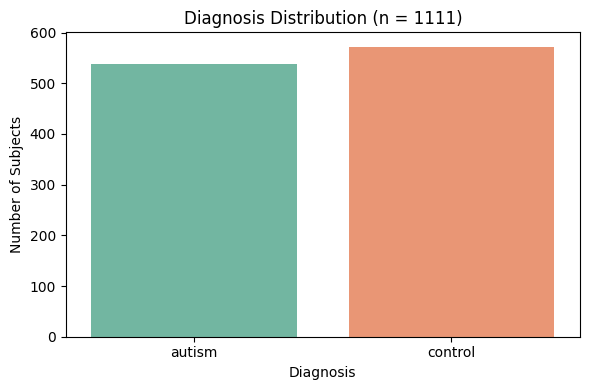

In [ ]:

plt.figure(figsize=(6,4))
sns.countplot(data=df_filtered, x='diagnosis', palette='Set2')
plt.title(f"Diagnosis Distribution (n = {len(df_filtered)})")
plt.xlabel("Diagnosis")
plt.ylabel("Number of Subjects")
plt.tight_layout()
plt.show()

<ipython-input-4-6c8fd135a25c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_filtered, x='diagnosis', y='age', palette='Set3')


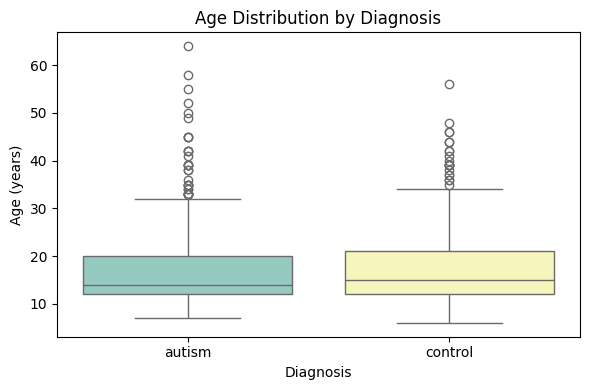

In [ ]:

plt.figure(figsize=(6,4))
sns.boxplot(data=df_filtered, x='diagnosis', y='age', palette='Set3')
plt.title("Age Distribution by Diagnosis")
plt.xlabel("Diagnosis")
plt.ylabel("Age (years)")
plt.tight_layout()
plt.show()

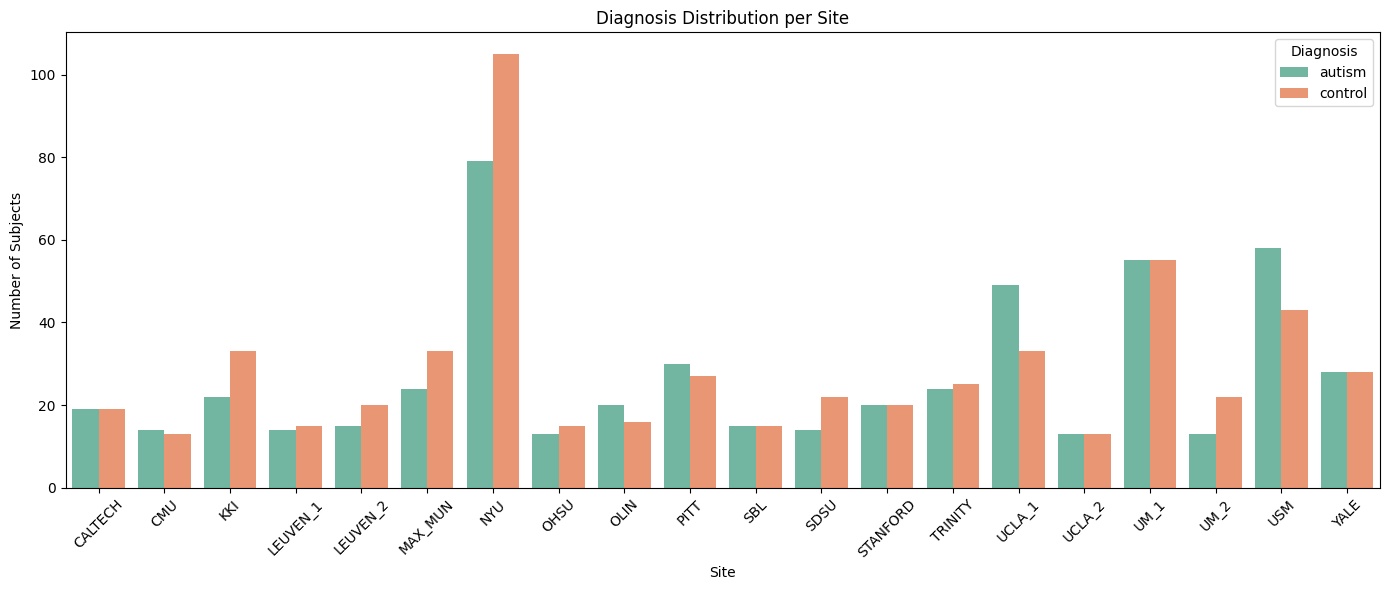

In [ ]:
plt.figure(figsize=(14,6))
sns.countplot(data=df_filtered, x='site', hue='diagnosis', order=sorted(df_filtered['site'].unique()), palette='Set2')
plt.title("Diagnosis Distribution per Site")
plt.xlabel("Site")
plt.ylabel("Number of Subjects")
plt.xticks(rotation=45)
plt.legend(title='Diagnosis')
plt.tight_layout()
plt.show()

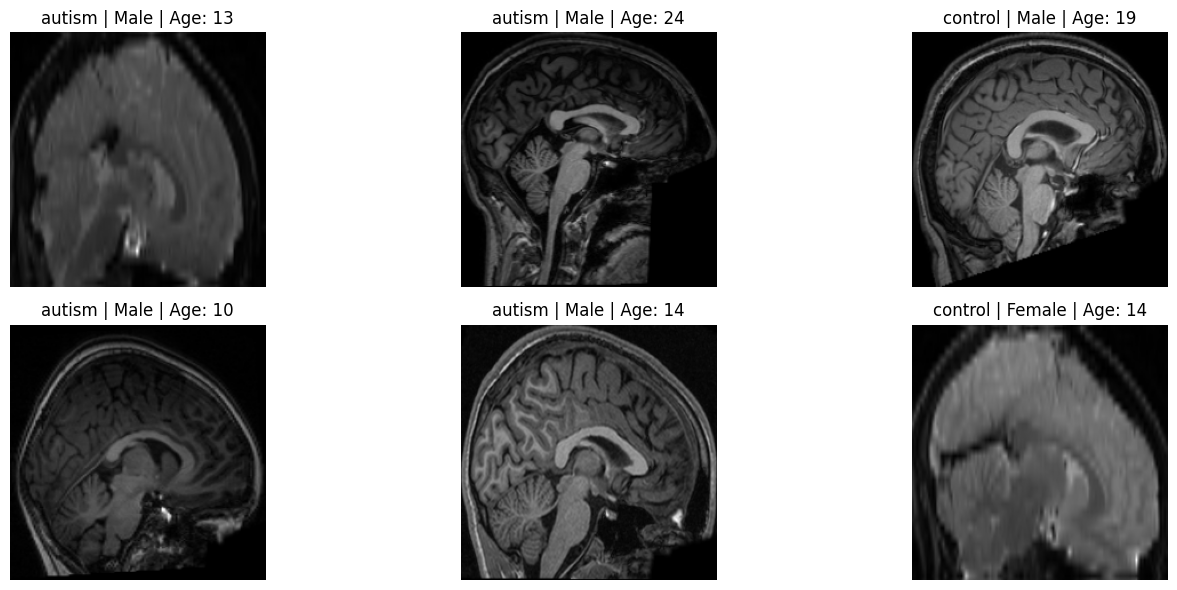

In [ ]:


sample = df_filtered.sample(6, random_state=0)

plt.figure(figsize=(15,6))
for i, (_, row) in enumerate(sample.iterrows()):
    subject_id = str(row['subject_id']).strip()
    img_path = os.path.join(image_folder, subject_id + ".png")

    try:
        img = Image.open(img_path)
        plt.subplot(2, 3, i+1)
        plt.imshow(img, cmap='gray')
        title = f"{row['diagnosis']} | {row['sex']} | Age: {row['age']}"
        plt.title(title)
        plt.axis('off')
    except FileNotFoundError:
        print(f"Image not found: {img_path}")

plt.tight_layout()
plt.show()